In [0]:
spark

SparkSession - hive 
 
 
 SparkContext 

 Spark UI 

 
 Version 
 v3.3.2 
 Master 
 local[8] 
 AppName 
 Databricks Shell

In [0]:
from pyspark.sql.types import StructField, StructType, StringType, IntegerType, BooleanType, DateType, DecimalType
from pyspark.sql.functions import *
from pyspark.sql.window import Window

In [0]:
from pyspark.sql import SparkSession
#create session  
spark = SparkSession.builder.appName("IPL Data 2017 Analysis").getOrCreate()

In [0]:
spark

SparkSession - hive 
 
 
 SparkContext 

 Spark UI 

 
 Version 
 v3.3.2 
 Master 
 local[8] 
 AppName 
 Databricks Shell

In [0]:
ball_by_ball_schema = StructType([
    StructField("match_id", IntegerType(), True),
    StructField("over_id", IntegerType(), True),
    StructField("ball_id", IntegerType(), True),
    StructField("innings_no", IntegerType(), True),
    StructField("team_batting", StringType(), True),
    StructField("team_bowling", StringType(), True),
    StructField("striker_batting_position", IntegerType(), True),
    StructField("extra_type", StringType(), True),
    StructField("runs_scored", IntegerType(), True),
    StructField("extra_runs", IntegerType(), True),
    StructField("wides", IntegerType(), True),
    StructField("legbyes", IntegerType(), True),
    StructField("byes", IntegerType(), True),
    StructField("noballs", IntegerType(), True),
    StructField("penalty", IntegerType(), True),
    StructField("bowler_extras", IntegerType(), True),
    StructField("out_type", StringType(), True),
    StructField("caught", BooleanType(), True),
    StructField("bowled", BooleanType(), True),
    StructField("run_out", BooleanType(), True),
    StructField("lbw", BooleanType(), True),
    StructField("retired_hurt", BooleanType(), True),
    StructField("stumped", BooleanType(), True),
    StructField("caught_and_bowled", BooleanType(), True),
    StructField("hit_wicket", BooleanType(), True),
    StructField("obstructingfeild", BooleanType(), True),
    StructField("bowler_wicket", BooleanType(), True),
    StructField("match_date", DateType(), True),
    StructField("season", IntegerType(), True),
    StructField("striker", IntegerType(), True),
    StructField("non_striker", IntegerType(), True),
    StructField("bowler", IntegerType(), True),
    StructField("player_out", IntegerType(), True),
    StructField("fielders", IntegerType(), True),
    StructField("striker_match_sk", IntegerType(), True),
    StructField("strikersk", IntegerType(), True),
    StructField("nonstriker_match_sk", IntegerType(), True),
    StructField("nonstriker_sk", IntegerType(), True),
    StructField("fielder_match_sk", IntegerType(), True),
    StructField("fielder_sk", IntegerType(), True),
    StructField("bowler_match_sk", IntegerType(), True),
    StructField("bowler_sk", IntegerType(), True),
    StructField("playerout_match_sk", IntegerType(), True),
    StructField("battingteam_sk", IntegerType(), True),
    StructField("bowlingteam_sk", IntegerType(), True),
    StructField("keeper_catch", BooleanType(), True),
    StructField("player_out_sk", IntegerType(), True),
    StructField("matchdatesk", DateType(), True)
])

In [0]:
ball_by_ball_df = spark.read.schema(ball_by_ball_schema).format("csv").option("header","true").load("s3://de-saibucket/Ball_By_Ball.csv")

In [0]:
Match_schema = StructType([
    StructField("match_sk", IntegerType(), True),
    StructField("match_id", IntegerType(), True),
    StructField("team1", StringType(), True),
    StructField("team2", StringType(), True),
    StructField("match_date", DateType(), True),
    StructField("season_year", IntegerType(), True),  # There is no "YearType", IntegerType is used for year
    StructField("venue_name", StringType(), True),
    StructField("city_name", StringType(), True),
    StructField("country_name", StringType(), True),
    StructField("toss_winner", StringType(), True),
    StructField("match_winner", StringType(), True),
    StructField("toss_name", StringType(), True),
    StructField("win_type", StringType(), True),
    StructField("outcome_type", StringType(), True),
    StructField("manofmach", StringType(), True),  # Assuming this means "man of the match"
    StructField("win_margin", IntegerType(), True),
    StructField("country_id", IntegerType(), True)
])

In [0]:
match_df = spark.read.schema(Match_schema).format("csv").option("header","true").load("s3://de-saibucket/Match.csv")

In [0]:
Players_schema = StructType([
    StructField("player_sk", IntegerType(), True),
    StructField("player_id", IntegerType(), True),
    StructField("player_name", StringType(), True),
    StructField("dob", DateType(), True),
    StructField("batting_hand", StringType(), True),
    StructField("bowling_skill", StringType(), True),
    StructField("country_name", StringType(), True)
])

In [0]:
Players_df = spark.read.schema(Players_schema).format("csv").option("header","true").load("s3://de-saibucket/Player.csv")

In [0]:
Players_Match_schema = StructType([
    StructField("player_match_sk", IntegerType(), True),
    StructField("playermatch_key", DecimalType(10, 2), True),  # Assuming precision of 10 and scale of 2 for decimal
    StructField("match_id", IntegerType(), True),
    StructField("player_id", IntegerType(), True),
    StructField("player_name", StringType(), True),
    StructField("dob", DateType(), True),
    StructField("batting_hand", StringType(), True),
    StructField("bowling_skill", StringType(), True),
    StructField("country_name", StringType(), True),
    StructField("role_desc", StringType(), True),
    StructField("player_team", StringType(), True),
    StructField("opposit_team", StringType(), True),
    StructField("season_year", IntegerType(), True),  # IntegerType used for season year
    StructField("is_manofthematch", BooleanType(), True),
    StructField("age_as_on_match", IntegerType(), True),
    StructField("isplayers_team_won", BooleanType(), True),
    StructField("batting_status", StringType(), True),
    StructField("bowling_status", StringType(), True),
    StructField("player_captain", StringType(), True),
    StructField("opposit_captain", StringType(), True),
    StructField("player_keeper", StringType(), True),
    StructField("opposit_keeper", StringType(), True)
])

In [0]:
Players_Match_df = spark.read.schema(Players_Match_schema).format("csv").option("header","true").load("s3://de-saibucket/Player_match.csv")

In [0]:
Teams_schema = StructType([
    StructField("team_sk", IntegerType(), True),
    StructField("team_id", IntegerType(), True),
    StructField("team_name", StringType(), True)
])


In [0]:
Teams_df = spark.read.schema(Teams_schema).format("csv").option("header","true").load("s3://de-saibucket/Team.csv")

In [0]:
#Filter to include only valid deliveries (excluding extras like wides and no balls for specific analysis)
ball_by_ball_df = ball_by_ball_df.filter((col("wides")==0) & (col("noballs")==0))

In [0]:
#Agreegation: Caluclate the total and average runs scored in each match and innings
total_and_avg_runs = ball_by_ball_df.groupBy("match_id", "innings_no").agg(
    sum("runs_scored").alias("total_runs"),
    avg("runs_scored").alias("average_runs")
) 

In [0]:
#Window Function: Caluclate running total of runs in each match for each over

windowSpec = Window.partitionBy("match_id","innings_no").orderBy("over_id")

ball_by_ball_df = ball_by_ball_df.withColumn(
    "running_total_runs",
    sum("runs_scored").over(windowSpec)
)

In [0]:
#Consitional column: Flag for high impact balls (either a wicket or more than 6 runs including extras)

ball_by_ball_df = ball_by_ball_df.withColumn(
    "high_impact",
    when((col("runs_scored") + col("extra_runs") > 6) | (col("bowler_wicket") == True), True).otherwise(False)
)

In [0]:
ball_by_ball_df.show(5)

+--------+-------+-------+----------+------------+------------+------------------------+----------+-----------+----------+-----+-------+----+-------+-------+-------------+--------------+------+------+-------+----+------------+-------+-----------------+----------+----------------+-------------+----------+------+-------+-----------+------+----------+--------+----------------+---------+-------------------+-------------+----------------+----------+---------------+---------+------------------+--------------+--------------+------------+-------------+-----------+------------------+-----------+
|match_id|over_id|ball_id|innings_no|team_batting|team_bowling|striker_batting_position|extra_type|runs_scored|extra_runs|wides|legbyes|byes|noballs|penalty|bowler_extras|      out_type|caught|bowled|run_out| lbw|retired_hurt|stumped|caught_and_bowled|hit_wicket|obstructingfeild|bowler_wicket|match_date|season|striker|non_striker|bowler|player_out|fielders|striker_match_sk|strikersk|nonstriker_match_sk|

In [0]:
from pyspark.sql.functions import year, month, dayofmonth, when

#Extracting year, month, and day from the match date for more detailed time based analyses. 
match_df = match_df.withColumn("year", year("match_date"))
match_df = match_df.withColumn("month", month("match_date"))
match_df = match_df.withColumn("date", dayofmonth("match_date"))

#High Margin win: Categorizing wins margin to high, med and low
match_df = match_df.withColumn(
    "win_margin_category",
    when(col("win_margin") >= 100, "High").
    when((col("win_margin") >= 50) & (col("win_margin") <  100), "Medium").
    otherwise("Low")
    )

#Analyse the impact of toss: Who wins the toss and the match
match_df = match_df.withColumn(
    "toss_match_winner", 
    when (col("toss_winner") == col("match_winner"), "Yes").otherwise("No")
)

#Show enhanced dataframe
match_df.show(2)


+--------+--------+--------------------+--------------------+----------+-----------+--------------------+----------+------------+--------------------+--------------------+---------+--------+------------+-----------+----------+----------+----+-----+----+-------------------+-----------------+
|match_sk|match_id|               team1|               team2|match_date|season_year|          venue_name| city_name|country_name|         toss_winner|        match_winner|toss_name|win_type|outcome_type|  manofmach|win_margin|country_id|year|month|date|win_margin_category|toss_match_winner|
+--------+--------+--------------------+--------------------+----------+-----------+--------------------+----------+------------+--------------------+--------------------+---------+--------+------------+-----------+----------+----------+----+-----+----+-------------------+-----------------+
|       0|  335987|Royal Challengers...|Kolkata Knight Ri...|      null|       2008|M Chinnaswamy Sta...| Bangalore|       I

In [0]:
from pyspark.sql.functions import lower, regexp_replace

#Normalize and clean players names
Players_df = Players_df.withColumn("player_name", lower(regexp_replace("player_name", "[^a-zA-Z0-9]","")))

#Handle missing values in "batting hand" and "bowling skill" with a default 'unknown'
Players_df = Players_df.na.fill({"batting_hand": "unknow", "bowling_skill": "unknow"})

#Categorizing players based on natting hand
Players_df = Players_df.withColumn(
    "batting_style", 
    when (col("batting_hand").contains("left"), "Left-Handed").otherwise("Right-Handed")
)

#Show the modified Players df 
Players_df.show(2)

+---------+---------+-----------+----+--------------+----------------+------------+-------------+
|player_sk|player_id|player_name| dob|  batting_hand|   bowling_skill|country_name|batting_style|
+---------+---------+-----------+----+--------------+----------------+------------+-------------+
|        0|        1|  scganguly|null| Left-hand bat|Right-arm medium|       India| Right-Handed|
|        1|        2| bbmccullum|null|Right-hand bat|Right-arm medium| New Zealand| Right-Handed|
+---------+---------+-----------+----+--------------+----------------+------------+-------------+
only showing top 2 rows



In [0]:
from pyspark.sql.functions import col, when, current_date, expr

#Add a 'veteran status' column based on player age

Players_Match_df = Players_Match_df.withColumn(
    "veteran_status",
    when (col("age_as_on_match") >= 35, "Veteran").otherwise("Non-Veteran") 
)

#Dynamic column to caluclate years since the debut

Players_Match_df = Players_Match_df.withColumn(
    "years_since_debut", 
    (year(current_date()) - col("season_year"))
)

#Show the enhanced dataframe
Players_Match_df.show() 

+---------------+---------------+--------+---------+---------------+----+--------------+--------------------+------------+---------+--------------------+--------------------+-----------+----------------+---------------+------------------+--------------+--------------+--------------+---------------+-------------+--------------+--------------+-----------------+
|player_match_sk|playermatch_key|match_id|player_id|    player_name| dob|  batting_hand|       bowling_skill|country_name|role_desc|         player_team|        opposit_team|season_year|is_manofthematch|age_as_on_match|isplayers_team_won|batting_status|bowling_status|player_captain|opposit_captain|player_keeper|opposit_keeper|veteran_status|years_since_debut|
+---------------+---------------+--------+---------+---------------+----+--------------+--------------------+------------+---------+--------------------+--------------------+-----------+----------------+---------------+------------------+--------------+--------------+--------

In [0]:
ball_by_ball_df.createOrReplaceTempView("ball_by_ball")
match_df.createOrReplaceTempView("match")
Players_df.createOrReplaceTempView("Players")
Players_Match_df.createOrReplaceTempView("Players_Match")
Teams_df.createOrReplaceTempView("Teams")


In [0]:
top_scoring_batsmen_per_season = spark.sql("""
SELECT
p.player_name,
m.season_year,
SUM(b.runs_scored) AS total_runs
FROM ball_by_ball b 
JOIN match m ON b.match_id = m.match_id
JOIN Players_Match pm ON m.match_id = pm.match_id AND b.striker = pm.player_id
JOIN Players p ON p.player_id = pm.player_id 
GROUP BY p.player_name, m.season_year
ORDER BY m.season_year, total_runs DESC
""")

In [0]:
top_scoring_batsmen_per_season.show(30)

+-------------+-----------+----------+
|  player_name|season_year|total_runs|
+-------------+-----------+----------+
|      semarsh|       2008|       614|
|     ggambhir|       2008|       532|
| stjayasuriya|       2008|       508|
|     srwatson|       2008|       463|
|      gcsmith|       2008|       437|
|  acgilchrist|       2008|       431|
|     ykpathan|       2008|       430|
|      skraina|       2008|       420|
|      msdhoni|       2008|       414|
|      vsehwag|       2008|       399|
|     rgsharma|       2008|       399|
|      rdravid|       2008|       370|
|    scganguly|       2008|       349|
|      sdhawan|       2008|       340|
| kcsangakkara|       2008|       319|
|     djhussey|       2008|       318|
|    rvuthappa|       2008|       316|
|   saasnodkar|       2008|       311|
|  yuvrajsingh|       2008|       299|
|      papatel|       2008|       297|
|yvenugopalrao|       2008|       283|
|     jamorkel|       2008|       235|
|    mvboucher|       200

In [0]:
economical_bowlers_powerplay = spark.sql("""
SELECT
p.player_name,
AVG(b.runs_scored) AS avg_runs_per_ball,
COUNT(b.bowler_wicket) AS total_wickets
FROM ball_by_ball b
JOIN Players_Match pm ON b.match_id = pm.match_id AND b.bowler = pm.player_id
JOIN Players p ON pm.player_id = p.player_id 
WHERE b.over_id <= 6 
GROUP BY p.player_name
HAVING COUNT(*) > 120
ORDER BY avg_runs_per_ball, total_wickets DESC
""")

In [0]:
economical_bowlers_powerplay.show(10)

+--------------+------------------+-------------+
|   player_name| avg_runs_per_ball|total_wickets|
+--------------+------------------+-------------+
|smsmsenanayake|0.8492063492063492|            0|
|      spnarine| 0.929718875502008|            0|
|     gdmcgrath|0.9324324324324325|            0|
|     slmalinga|0.9407630522088354|            0|
|  sohailtanvir| 0.946969696969697|            0|
|     achandila|0.9513888888888888|            0|
|      dpnannes|0.9532163742690059|            0|
|        bkumar|0.9561487130600572|            0|
|  bwhilfenhaus|            0.9625|            0|
|      rrampaul|0.9629629629629629|            0|
+--------------+------------------+-------------+
only showing top 10 rows



In [0]:
toss_impact_individual_matches = spark.sql("""
SELECT m.match_id , m.toss_winner, m.toss_name, m.match_winner,
        CASE WHEN m.toss_winner = m.match_winner THEN 'WON' ELSE 'LOST' END AS match_outcome
FROM match m
WHERE m.toss_name IS NOT NULL 
ORDER BY m.match_id
""")

In [0]:
toss_impact_individual_matches.show(10)

+--------+--------------------+---------+--------------------+-------------+
|match_id|         toss_winner|toss_name|        match_winner|match_outcome|
+--------+--------------------+---------+--------------------+-------------+
|  335987|Royal Challengers...|    field|Kolkata Knight Ri...|         LOST|
|  335988| Chennai Super Kings|      bat| Chennai Super Kings|          WON|
|  335989|    Rajasthan Royals|      bat|    Delhi Daredevils|         LOST|
|  335990|      Mumbai Indians|      bat|Royal Challengers...|         LOST|
|  335991|     Deccan Chargers|      bat|Kolkata Knight Ri...|         LOST|
|  335992|     Kings XI Punjab|      bat|    Rajasthan Royals|         LOST|
|  335993|     Deccan Chargers|      bat|    Delhi Daredevils|         LOST|
|  335994|      Mumbai Indians|    field| Chennai Super Kings|         LOST|
|  335995|    Rajasthan Royals|    field|    Rajasthan Royals|          WON|
|  335996|      Mumbai Indians|    field|     Kings XI Punjab|         LOST|

In [0]:
avg_runs_scored_in_wins = spark.sql("""
SELECT p.player_name, AVG(b.runs_scored) AS avg_runs_scored_in_wins, COUNT(*) AS innings_played
FROM ball_by_ball b 
JOIN Players_Match pm ON b.match_id = pm.match_id AND b.striker = pm.player_id
JOIN Players p ON pm.player_id = p.player_id
JOIN match m ON pm.match_id = m.match_id
WHERE m.match_winner = pm.player_team
GROUP BY p.player_name
ORDER BY avg_runs_scored_in_wins DESC
""")

In [0]:
avg_runs_scored_in_wins.show(10)

+------------+-----------------------+--------------+
| player_name|avg_runs_scored_in_wins|innings_played|
+------------+-----------------------+--------------+
|  rashidkhan|                    6.0|             1|
|shahidafridi|     3.3333333333333335|             6|
|     anahmed|                    3.0|             3|
|     babhatt|                    3.0|             2|
|      snkhan|     2.5789473684210527|            19|
|   spjackson|                    2.4|             5|
|harmeetsingh|     2.3333333333333335|             6|
|     umargul|     2.3076923076923075|            13|
|   smpollock|                    2.2|            15|
|      msgony|     2.1379310344827585|            29|
+------------+-----------------------+--------------+
only showing top 10 rows



In [0]:
import matplotlib.pyplot as plt

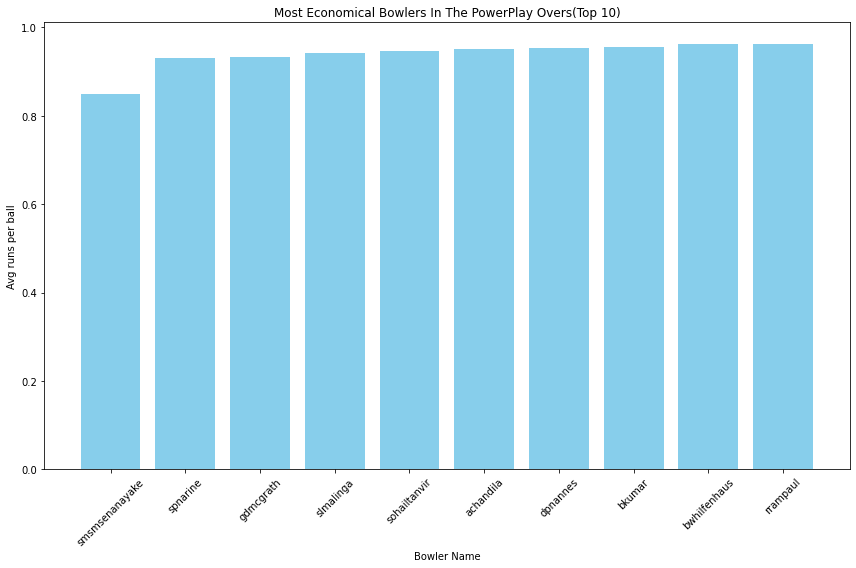

In [0]:
#Assuming 'economical_bowlers_powerplay' is already executed d available as a spark df

economical_bowlers_pd = economical_bowlers_powerplay.toPandas()

#Visualising using matplot library

plt.figure(figsize=(12,8)) 

#Limiting to top 10 for clarity in the plot

top_ecnomical_bowlers = economical_bowlers_pd.nsmallest(10, 'avg_runs_per_ball')
plt.bar(top_ecnomical_bowlers['player_name'], top_ecnomical_bowlers['avg_runs_per_ball'], color = 'skyblue')
plt.xlabel('Bowler Name')
plt.ylabel('Avg runs per ball')
plt.title('Most Economical Bowlers In The PowerPlay Overs(Top 10)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
        

In [0]:
import seaborn as sns

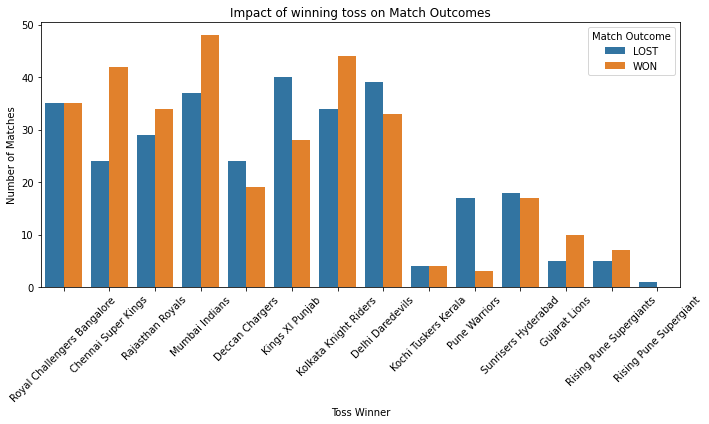

In [0]:

toss_impact_pd = toss_impact_individual_matches.toPandas()

#Creating a count plot to show win/loss after winning toss.

plt.figure(figsize=(10,6)) 
sns.countplot(x='toss_winner', hue='match_outcome', data=toss_impact_pd)
plt.title('Impact of winning toss on Match Outcomes')
plt.xlabel('Toss Winner')
plt.ylabel('Number of Matches')
plt.legend(title='Match Outcome')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
        

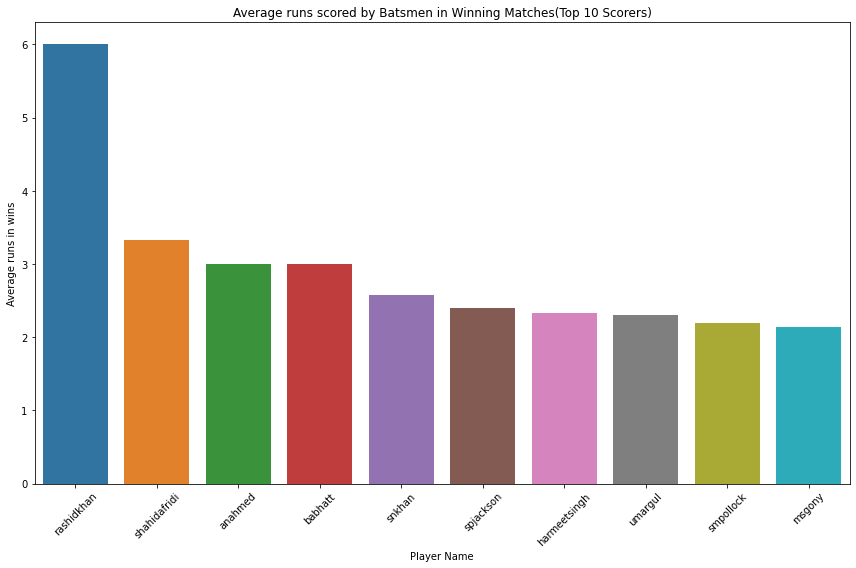

In [0]:
#Average Runs 

avg_runs_pd = avg_runs_scored_in_wins.toPandas()

#Using Seaborn
plt.figure(figsize=(12,8)) 
top_scorers = avg_runs_pd.nlargest(10, 'avg_runs_scored_in_wins')
sns.barplot(x='player_name', y='avg_runs_scored_in_wins', data=top_scorers)
plt.title('Average runs scored by Batsmen in Winning Matches(Top 10 Scorers)')
plt.xlabel('Player Name')
plt.ylabel('Average runs in wins')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
        

In [0]:
# SQL Query

scores_by_venue = spark.sql("""
SELECT venue_name, AVG(total_runs) AS average_score, MAX(total_runs) AS highest_score
FROM (
    SELECT ball_by_ball.match_id, match.venue_name, SUM(runs_scored) AS total_runs
    FROM ball_by_ball
    JOIN match ON ball_by_ball.match_id = match.match_id
    GROUP BY ball_by_ball.match_id, match.venue_name
)
GROUP BY venue_name
ORDER BY average_score DESC
""")



In [0]:
scores_by_venue.show()


+--------------------+------------------+-------------+
|          venue_name|     average_score|highest_score|
+--------------------+------------------+-------------+
|   Brabourne Stadium| 325.8181818181818|          399|
|Saurashtra Cricke...|             319.1|          393|
|Punjab Cricket As...|317.42857142857144|          341|
|    Barabati Stadium|311.57142857142856|          404|
|          Green Park|             308.0|          378|
|Maharashtra Crick...|302.06666666666666|          377|
|Rajiv Gandhi Inte...|             302.0|          365|
|Himachal Pradesh ...| 301.1111111111111|          371|
|MA Chidambaram St...| 299.7291666666667|          447|
|Sardar Patel Stad...|             298.0|          377|
|Punjab Cricket As...|296.77142857142854|          426|
|    Wankhede Stadium| 296.4736842105263|          419|
|Holkar Cricket St...|             296.2|          371|
|Punjab Cricket As...|             296.0|          380|
|M Chinnaswamy Sta...| 292.7878787878788|       

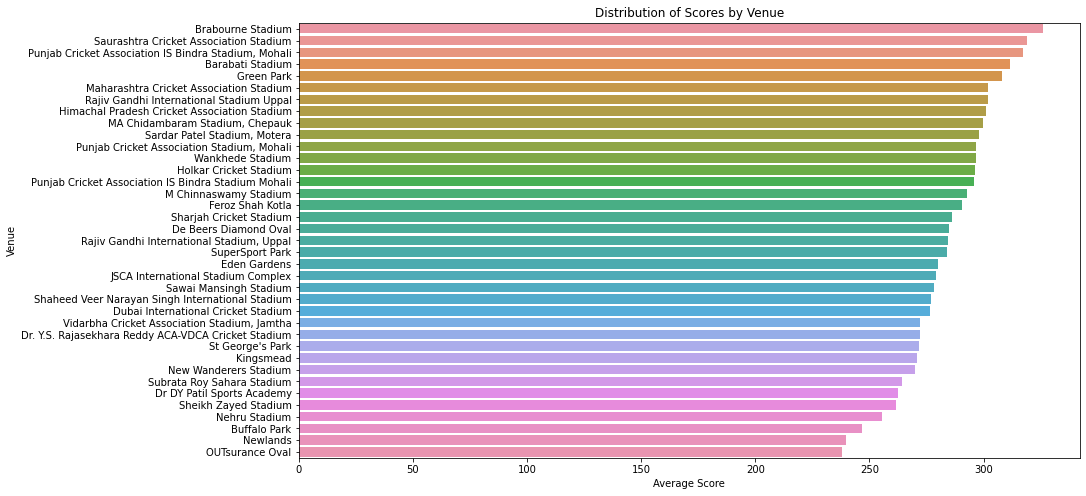

In [0]:

# Convert to Pandas DataFrame
scores_by_venue_pd = scores_by_venue.toPandas()

# Plot
plt.figure(figsize=(14, 8))
sns.barplot(x='average_score', y='venue_name', data=scores_by_venue_pd)
plt.title('Distribution of Scores by Venue')
plt.xlabel('Average Score')
plt.ylabel('Venue')
plt.show()

In [0]:
# Execute SQL Query
dismissal_types = spark.sql("""
SELECT out_type, COUNT(*) AS frequency
FROM ball_by_ball
WHERE out_type IS NOT NULL
GROUP BY out_type
ORDER BY frequency DESC
""")

dismissal_types.show()

+--------------------+---------+
|            out_type|frequency|
+--------------------+---------+
|      Not Applicable|   137852|
|              caught|     3678|
|              bowled|     1382|
|             run out|      744|
|        Keeper Catch|      695|
|                 lbw|      455|
|             stumped|      222|
|   caught and bowled|      211|
|          hit wicket|        9|
|        retired hurt|        9|
|obstructing the f...|        1|
+--------------------+---------+



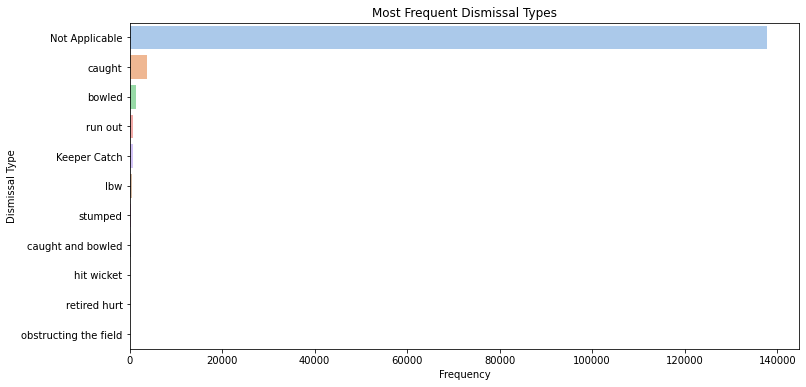

In [0]:
# Convert to Pandas DataFrame
dismissal_types_pd = dismissal_types.toPandas()

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x='frequency', y='out_type', data=dismissal_types_pd, palette='pastel')
plt.title('Most Frequent Dismissal Types')
plt.xlabel('Frequency')
plt.ylabel('Dismissal Type')
plt.show()

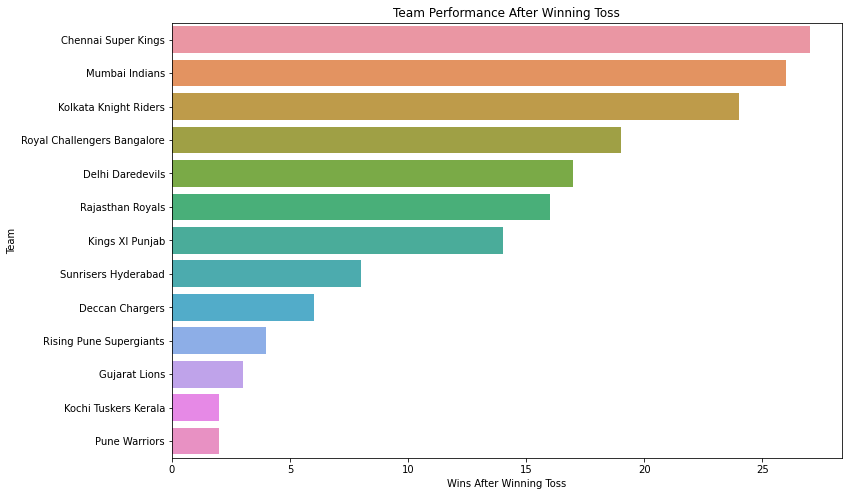

In [0]:

# Execute SQL Query
team_toss_win_performance = spark.sql("""
SELECT team1, COUNT(*) AS matches_played, SUM(CASE WHEN toss_winner = match_winner THEN 1 ELSE 0 END) AS wins_after_toss
FROM match
WHERE toss_winner = team1
GROUP BY team1
ORDER BY wins_after_toss DESC
""")

     


# Convert to Pandas DataFrame
team_toss_win_pd = team_toss_win_performance.toPandas()

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(x='wins_after_toss', y='team1', data=team_toss_win_pd)
plt.title('Team Performance After Winning Toss')
plt.xlabel('Wins After Winning Toss')
plt.ylabel('Team')
plt.show()